<a href="https://colab.research.google.com/github/Clemenciah/Personal-Learning/blob/master/Clemencia_Mawada_Yaw_Emma_Ass_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Audio Classifier
=========================

## Important information

* Choose a group name/number and rename the file with it.
* Be sure to enter the names of every member in the group in the cell below.
* Use the power of number and work together as a team.
* You can employ the use of the HPC (high perfomance computer) provided your server account has been established.
* The tutor is always available to give more explanation and assistance whenever/wherever required, but make sure you have made effort yourself.
* Please remove all test codes.
* The solutions to the tasks should be turn in on Friday 13th Dec, end of the day (12am). 
* A notebook submission is required per group, no multiple submissions from same group. Submit by attaching only the .ipynb file please, not zip and I don't need other files (e.g the data) I already have them.

Group 8 members:

  -  Clemencia Siro 
  - Mawada Omer Alfaroug Mohammed 
  - Yaw Brefo
  -  Emmanuel Agbeli

This task is inspired by the Audio Classifier Tutorial (found [here](https://pytorch.org/tutorials/beginner/audio_classifier_tutorial.html?highlight=audio))
**Author**: `Winston Herring <https://github.com/winston6>`_

This tutorial will show you how to correctly format an audio dataset and
then train/test an audio classifier network on the dataset. First, let’s
import the common torch packages as well as ``torch``, ``torchaudio``, ``pandas``,
and ``numpy``. ``torchaudio`` is available `here <https://github.com/pytorch/audio>`_
and can be installed by following the
instructions on the website but I encountered a lot of trouble installing it, this ` conda install -c pytorch torchaudio-cpu ` rather worked for me.

If you have a CUDA GPU use that. Running
the network on a GPU will greatly decrease the training/testing runtime.




1: Importing the Dataset
---------------------

We will use the UrbanSound8K dataset to train our network. It is
available for free `here <https://urbansounddataset.weebly.com/>`_ and contains
10 audio classes with over 8000 audio samples! Once you have downloaded
the compressed dataset, extract it to your current working directory.
First, we will look at the csv file that provides information about the
individual sound files. ``pandas`` allows us to open the csv file and
use ``.iloc()`` to access the data within it.




The 10 audio classes in the UrbanSound8K dataset are air_conditioner,
car_horn, children_playing, dog_bark, drilling, enginge_idling,
gun_shot, jackhammer, siren, and street_music. Let’s play a couple files
and see what they sound like. The first file is street music and the
second is an air conditioner.




2: Formatting the Data
-------------------

Now that we know the format of the csv file entries, we can construct
our dataset. We will create a rapper class for our dataset using
``torch.utils.data.Dataset`` that will handle loading the files and
performing some formatting steps. The UrbanSound8K dataset is separated
into 10 folders. We will use the data from 9 of these folders to train
our network and then use the 10th folder to test the network. The rapper
class will store the file names, labels, and folder numbers of the audio
files in the inputted folder list when initialized. The actual loading
and formatting steps will happen in the access function ``__getitem__``.

In ``__getitem__``, we use ``torchaudio.load()`` to convert the wav
files to tensors. ``torchaudio.load()`` returns a tuple containing the
newly created tensor along with the sampling frequency of the audio file
(44.1kHz for UrbanSound8K). The dataset uses two channels for audio so
we will use ``torchaudio.transforms.DownmixMono()`` (not available in the latest version of `torchaudio`) to convert the audio
data to one channel. Next, we need to format the audio data. The network
we will make takes an input size of 32,000, while most of the audio
files have well over 100,000 samples. The UrbanSound8K audio is sampled
at 44.1kHz, so 32,000 samples only covers around 700 milliseconds. By
downsampling the audio to aproximately 8kHz, we can represent 4 seconds
with the 32,000 samples. This downsampling is achieved by taking every
fifth sample of the original audio tensor. Not every audio tensor is
long enough to handle the downsampling so these tensors will need to be
padded with zeros. The minimum length that won’t require padding is
160,000 samples.




3: Define the Network
------------------

For this task we want to closely reproduce the achitectures described in https://arxiv.org/pdf/1610.00087.pdf. You task is to read extensively the paper and reproduce the achitectures <font color='green'> M3, M5, M11 and M18. The M34-res is a bonus.</font>
While attempting to reproduce the architectures endeavour to read through the common [pitfalls](https://urbansounddataset.weebly.com/urbansound8k.html#10foldCV) to get it right.

We will use the same optimization technique used in the paper, an Adam
optimizer with weight decay set to 0.0001. At first, we will train with
a learning rate of 0.01, but we will use a ``scheduler`` to decrease it
to 0.001 during training.




4: Training and Testing the Network
--------------------------------

You can define a training function that will feed our training data into the model and perform the backward pass and optimization steps. You can also make one for testing the networks accuracy and set the model to ``eval()`` mode and then run inference on the test dataset. Calling ``eval()`` sets the training variable in all modules in the network to false. Certain layers like batch normalization and dropout layers behave differently during training so this step is crucial for getting correct results.




Finally, we can train and test the network. Train the network for as many epochs as time allows you. The network will be tested after each epoch to see how the accuracy varies during the training.

Conclusion
----------

If trained on 9 folders, the network should be about 40% accurate by the end of the training process for the least possible epochs. Training on less folders will result in a lower overall accuracy. Greater accuracies can be achieved using deeper CNNs at the expense of a larger memory footprint.

For more advanced audio applications, such as speech recognition,
recurrent neural networks (RNNs) are commonly used. There are also other
data preprocessing methods, such as finding the mel frequency cepstral
coefficients (MFCC), that can reduce the size of the dataset.




<font color='red'>GOOD NEWS</font> : Solutions to the first two section have been given to you freely. <font color='blue'>You are welcome</font>. 

In [0]:
!pip install torchaudio                                                                                                                 

     |████████████████████████████████| 2.7MB 2.8MB/s 
     |████████████████████████████████| 773.1MB 23kB/s 
ERROR: torchvision 0.4.2 has requirement torch==1.3.1, but you'll have torch 1.3.0 which is incompatible.
  Found existing installation: torch 1.3.1
    Uninstalling torch-1.3.1:
      Successfully uninstalled torch-1.3.1


In [0]:
import os
import glob
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchaudio

In [0]:
import IPython.display as ipd 

In [0]:
#rapper for the UrbanSound8K dataset

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
class AudioDataset(Dataset):
    """
    A rapper class for the UrbanSound8K dataset.
    
    """

    def __init__(self, file_path, audio_paths, folds):
        """
        Args:
            file_path(string): path to the audio csv file
            root_dir(string): directory with all the audio folds
            folds: integer corresponding to audio fold number or list of fold number if more than one fold is needed
        """
        self.audio_file = pd.read_csv(file_path)
        self.folds = folds
        self.audio_paths = glob.glob(audio_paths + '/*' + str(self.folds) + '/*')
    
    

    def __len__(self):
        return len(self.audio_paths)

    def __getitem__(self, idx):
        
        audio_path = self.audio_paths[idx]
        audio, rate = torchaudio.load(audio_path, normalization=True)
        audio = audio.mean(0, keepdim=True)
        c, n = audio.shape
        zero_need = 160000 - n
        audio_new = F.pad(audio, (zero_need //2, zero_need //2), 'constant', 0)
        audio_new = audio_new[:,::5]
        
        #Getting the corresponding label
        audio_name = audio_path.split(sep='/')[-1]
        labels = self.audio_file.loc[self.audio_file.slice_file_name == audio_name].iloc[0,-2]
        
        return audio_new, labels

In [0]:
### Define the paths of the data. 
file_path = 'drive/My Drive/UrbanSound8K/metadata/UrbanSound8K.csv'
audio_paths = 'drive/My Drive/UrbanSound8K/audio'
folds = list(range(1,10))

In [0]:
#### Instantiate the audio data to an object called AudioData. 
Trainset = AudioDataset(file_path=file_path,audio_paths=audio_paths,folds=folds)
Testset = AudioDataset(file_path=file_path,audio_paths=audio_paths,folds=[10])

In [0]:
### Visualise the csv file.
Trainset.audio_file.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [0]:
### Define a dataLoader 
Loader_trainset = DataLoader(Trainset,batch_size=128)
Loader_test = DataLoader(Testset,batch_size=128)

In [0]:
len(Loader_trainset.dataset) , len(Loader_test.dataset)

(7895, 1710)

In [0]:
data , label = next(iter(Loader_trainset))

### Model 1:

### Network of 3 layers 

In [0]:
#### Define the first architecture M3 
## Define class object. 
import torch.nn as nn
import torch.nn.functional as F
class M3_net(nn.Module):
  def __init__(self):
    super(M3_net,self).__init__()
    ### The layers are initialize at this point. 
    self.conv1 = nn.Conv1d(in_channels=1,out_channels=256,kernel_size=80,stride=4)
    self.bn1 = nn.BatchNorm1d(num_features=256)
    self.pool1 = nn.MaxPool1d(kernel_size=4)

    self.con2 = nn.Conv1d(in_channels=256,out_channels=256,kernel_size=3,stride=1)
    self.bn2 = nn.BatchNorm1d(num_features=256)
    self.pool2 = nn.MaxPool1d(kernel_size=4)

    self.avg = nn.AvgPool1d(kernel_size=498)
    self.fc = nn.Linear(in_features=256,out_features=10)
  
  def forward(self,x):
    ## operation layers are defined within the program.
    x = self.conv1(x)
    x = self.bn1(x)
    x = F.relu(x)
    x = self.pool1(x)

    x = self.con2(x)
    x = self.bn2(x)
    x = F.relu(x)
    x = self.pool2(x)
    
    x = self.avg(x)
    x = x.permute(0,2,1)
    x = self.fc(x)
    x = F.log_softmax(x,dim=2)
    x = x.view(-1,10)
   
    return x

### Model 2:

- Network of five layers 

In [0]:
class M5_net(nn.Module):
  def __init__(self):
    super(M5_net,self).__init__()
    ### The layers are initialize at this point. 
    self.conv1 = nn.Conv1d(in_channels=1,out_channels=128,kernel_size=80,stride=4)
    self.bn1 = nn.BatchNorm1d(num_features=128)
    self.conv2 = nn.Conv1d(in_channels=128,out_channels=128,kernel_size=3,stride=1)
    self.bn2 = nn.BatchNorm1d(num_features=128)
    self.conv3 = nn.Conv1d(in_channels=128,out_channels=256,kernel_size=3,stride=1)
    self.bn3 = nn.BatchNorm1d(num_features=256)
    self.conv4 = nn.Conv1d(in_channels=256,out_channels=512,kernel_size=3,stride=1)
    self.bn4 = nn.BatchNorm1d(num_features=512)
    #self.conv5 = nn.Conv1d(512, 10, 3)
    self.avgPool = nn.AvgPool1d(30) 
    self.fc1 = nn.Linear(512, 10)
      
  def forward(self,x):
    ## operation layers are defined within the program.
    x = self.conv1(x)
    x = self.bn1(x)
    x = F.relu(x)
    x = F.max_pool1d(x,kernel_size=4)
    x = self.conv2(x)
    x = self.bn2(x)
    x = F.relu(x)
    x = F.max_pool1d(x,kernel_size=4)
    x = self.conv3(x)
    x = self.bn3(x)
    x = F.relu(x)
    x = F.max_pool1d(x,kernel_size=4)
    x = self.conv4(x)
    x = self.bn4(x)
    x = F.relu(x)
    x = F.max_pool1d(x,kernel_size=4)
    x = self.avgPool(x)
    x = x.view(-1, 512)
    x = self.fc1(x)
    x = F.log_softmax(x,dim=1)
    return x

### Model 3:

- Network of 11 layers. 


In [0]:
class M11_net(nn.Module):
    def __init__(self):
        super(M11_net, self).__init__()
        self.conv1 = nn.Conv1d(1, 64, 80, 4)
        self.bnorm1 = nn.BatchNorm1d(64)
        self.pool1 = nn.MaxPool1d(4)
        self.conv2 = nn.Conv1d(64, 64, 3)
        self.bnorm2 = nn.BatchNorm1d(64) 
        
        self.conv21 = nn.Conv1d(64, 64, 3)
        self.bnorm21 = nn.BatchNorm1d(64)
        self.pool21 = nn.MaxPool1d(4)
        self.conv3 = nn.Conv1d(64, 128, 3)
        self.bnorm3 = nn.BatchNorm1d(128) 
        
        self.conv31 = nn.Conv1d(128, 128, 3)
        self.bnorm31 = nn.BatchNorm1d(128)
        self.pool31 = nn.MaxPool1d(4)
        self.conv4 = nn.Conv1d(128,256,3)
        self.bnorm4 = nn.BatchNorm1d(256) 
        
        self.conv41 = nn.Conv1d(256, 256, 3)
        self.bnorm41 = nn.BatchNorm1d(256) 
        
        self.conv42 = nn.Conv1d(256, 256, 3)
        self.bnorm42 = nn.BatchNorm1d(256)
        self.pool42 = nn.MaxPool1d(4)
        self.conv5 = nn.Conv1d(256, 512, 3)
        self.bnorm5 = nn.BatchNorm1d(512) 
        
        self.conv51 = nn.Conv1d(512, 512, 3)
        self.bnorm51 = nn.BatchNorm1d(512)
        self.pool51 = nn.MaxPool1d(4)
        self.relu = nn.ReLU() 
        self.avgPool = nn.AvgPool1d(6) 
        self.fc1 = nn.Linear(512, 10) 
        
    def forward(self, x):
      #first conv
        x = self.conv1(x)
        x = self.relu(self.bnorm1(x))
        x = self.pool1(x)
      #second conv
        x = self.conv2(x)
        x = self.relu(self.bnorm2(x)) 
        
        x = self.conv21(x)
        x = self.relu(self.bnorm21(x))
        x = self.pool21(x)
      #third conv
        x = self.conv3(x)
        x = self.relu(self.bnorm3(x))
        
        x = self.conv31(x)
        x = self.relu(self.bnorm31(x))
        x = self.pool31(x)
      #forth conv
        x = self.conv4(x)
        x = self.relu(self.bnorm4(x))
        
        x = self.conv41(x)
        x = self.relu(self.bnorm41(x))
       
        x = self.conv42(x)
        x = self.relu(self.bnorm42(x))
        x = self.pool42(x)
        #fifth conv
        x = self.conv5(x)
        x = self.relu(self.bnorm5(x))
        
        x = self.conv51(x)
        x = self.relu(self.bnorm51(x))
        x = self.pool51(x) 

        x = self.avgPool(x)
        x = x.view(-1, 512)
        x = self.fc1(x)
        x = F.log_softmax(x,dim=1)
        return x

### Model 4: 

- Network of 18 layers  

In [0]:
###### Implement the model 18 

class M18_net(nn.Module):
  #### define a constructor 
  def __init__(self):
    ## intialize the variable. 
    super(M18_net,self).__init__()
    self.con1 = nn.Conv1d(in_channels=1,out_channels=64,kernel_size=80,stride=4)
    self.bn1 = nn.BatchNorm1d(num_features=64)
    self.con21 = nn.Conv1d(in_channels=64,out_channels=64,kernel_size=3)
    self.con22 = nn.Conv1d(in_channels=64,out_channels=64,kernel_size=3)
    self.con23 = nn.Conv1d(in_channels=64,out_channels=64,kernel_size=3)
    self.con24 = nn.Conv1d(in_channels=64,out_channels=64,kernel_size=3)
    self.bn21 = nn.BatchNorm1d(num_features=64)
    self.bn22 = nn.BatchNorm1d(num_features=64)
    self.bn23 = nn.BatchNorm1d(num_features=64)
    self.bn24 = nn.BatchNorm1d(num_features=64)
    self.con31 = nn.Conv1d(in_channels=64,out_channels=128,kernel_size=3)
    self.con32 = nn.Conv1d(in_channels=128,out_channels=128,kernel_size=3)
    self.con33 = nn.Conv1d(in_channels=128,out_channels=128,kernel_size=3)
    self.con34 = nn.Conv1d(in_channels=128,out_channels=128,kernel_size=3)
    self.bn31 = nn.BatchNorm1d(num_features=128)
    self.bn32 = nn.BatchNorm1d(num_features=128)
    self.bn33 = nn.BatchNorm1d(num_features=128)
    self.bn34 = nn.BatchNorm1d(num_features=128)
    self.con41 = nn.Conv1d(in_channels=128,out_channels=256,kernel_size=3)
    self.con42 = nn.Conv1d(in_channels=256,out_channels=256,kernel_size=3)
    self.con43 = nn.Conv1d(in_channels=256,out_channels=256,kernel_size=3)
    self.con44 = nn.Conv1d(in_channels=256,out_channels=256,kernel_size=3)
    self.bn41 = nn.BatchNorm1d(num_features=256)
    self.bn42 = nn.BatchNorm1d(num_features=256)
    self.bn43 = nn.BatchNorm1d(num_features=256)
    self.bn44 = nn.BatchNorm1d(num_features=256)
    self.con51 = nn.Conv1d(in_channels=256,out_channels=512,kernel_size=3)
    self.con52 = nn.Conv1d(in_channels=512,out_channels=512,kernel_size=3)
    self.con53 = nn.Conv1d(in_channels=512,out_channels=512,kernel_size=3)
    self.con54 = nn.Conv1d(in_channels=512,out_channels=512,kernel_size=3)
    self.bn51 = nn.BatchNorm1d(num_features=512)
    self.bn52 = nn.BatchNorm1d(num_features=512)
    self.bn53 = nn.BatchNorm1d(num_features=512)
    self.bn54 = nn.BatchNorm1d(num_features=512)
    self.avg = nn.AvgPool1d(kernel_size=5)
    self.fc = nn.Linear(in_features=512,out_features=10)
 

  def forward(self,x):
    ### forward function.
    x = self.con1(x)
    x = F.relu(self.bn1(x))
    
    x = F.max_pool1d(x,kernel_size=4)
    
    ### first stack layers
    x = self.con21(x)
    x = F.relu(self.bn21(x))
    x = self.con22(x)
    x = F.relu(self.bn22(x))
    x = self.con23(x)
    x = F.relu(self.bn23(x))
    x = self.con24(x)
    x = F.relu(self.bn24(x))

    x = F.max_pool1d(x,kernel_size=4)

    ### second stack layers 
    x = self.con31(x)
    x = F.relu(self.bn31(x))
    x = self.con32(x)
    x = F.relu(self.bn32(x))
    x = self.con33(x)
    x = F.relu(self.bn33(x))
    x = self.con34(x)
    x = F.relu(self.bn34(x))

    x = F.max_pool1d(x,kernel_size=4)

    ### third stack layers 
    x = self.con41(x)
    x = F.relu(self.bn41(x))
    x = self.con42(x)
    x = F.relu(self.bn42(x))
    x = self.con43(x)
    x = F.relu(self.bn43(x))
    x = self.con44(x)
    x = F.relu(self.bn44(x))

    x = F.max_pool1d(x,kernel_size=4)

    ### four stack layers 
    x = self.con51(x)
    x = F.relu(self.bn51(x))
    x = self.con52(x)
    x = F.relu(self.bn52(x))
    x = self.con53(x)
    x = F.relu(self.bn53(x))
    x = self.con54(x)
    x = F.relu(self.bn54(x))
    x = F.max_pool1d(x,kernel_size=4)

    x = self.avg(x)
    ### flatten the output of the last layer 
    x = x.view(-1,512)
    x = self.fc(x)
    x = F.log_softmax(x,dim=1)
    return x


In [0]:
### Instantiate the first model. 
Network1 = M3_net()

In [0]:
M5_net = M5_net()

In [0]:
M11_net = M11_net()

In [0]:
### Instantiate the forth model 
M18_network = M18_net()

### Summary of model 1 Architecture 

In [0]:
### find the number of parameters in the model.
print("The number of parameters: ",round(sum(p.numel() for p in Network1.parameters())/1000000,1),"M")

The number of parameters:  0.2 M


### Summary of model 4 Architecture 

In [0]:
### find the number of parameters in the model.
print("The number of parameters: ",round(sum(p.numel() for p in M18_network.parameters())/1000000,1),"M")

The number of parameters:  3.7 M


In [0]:
#### define the optimizer for the model. 
from torch import optim  



def get_num(preds,labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

def initilize_weights(m):
  if type(m) == nn.Conv1d or type(m) == nn.Linear:
    nn.init.xavier_uniform_(m.weight.data)

#### Training function epoch to our model
def Train_evaluation_loop(model,Loader_trainset,Loader_test,epoch=10):

  device = "cuda:0"
  ### Set the model to GPU. 
  model = model.apply(initilize_weights)
  Network = model.to(device)
  Optimizer = optim.Adam(Network.parameters(),lr=0.01,weight_decay=0.0001)

  #### define an empty list for cumulating the loss and accuracy 
  loss_train = []
  top_1_train = []
  loss_test = []
  accuracy_test = []
  for epoch in range(epoch):
    ### print the number of epoch
    print(f"Epoch {epoch + 1}")
    correct_pred = 0 
    loss_batch = []
    Loss1 = 0 
    for i, (datasets,targets) in enumerate(Loader_trainset):
      ### set to the GPU 
      datasets = datasets.to(device)
      targets = targets.to(device)
      Optimizer.zero_grad()
      ### Fit the model to the datasets 
      pred = Network(datasets)
      loss = F.nll_loss(pred,targets)
      loss_batch.append(loss.item())
      Loss1 += loss.item()

      #### set optimizer to zero_grad 
      loss.backward()
      ### update of weights 
      Optimizer.step()
      correct_pred += get_num(preds=pred,labels=targets) * datasets.shape[0] / 100
    ###  average of loss 
    Loss = Loss1/len(Loader_trainset)
    top_1 = (correct_pred / len(Loader_trainset.dataset)) * 100
    top_1_train.append(top_1)
    loss_train.append(Loss)
    #print('Train accuracy: {:.2f}%'.format(top_1))
    #print('Train loss: {}'.format(Loss))

    with torch.no_grad():
        correct = 0#
        Loss1 = 0 
        
        for i, (dataset,targets) in enumerate(Loader_test):
        ### set to GPU using cuda()
          dataset = dataset.to(device)
          targets = targets.to(device)
        
        ### predict the outcome 
          predicts = Network(dataset)
          loss = F.nll_loss(predicts,targets)

        #### sum the loss
          Loss1 += loss.item()
          correct += get_num(preds=predicts,labels=targets) * dataset.shape[0]/100
    Loss = Loss1/len(Loader_test) 
    top_test = correct /len(Loader_test.dataset) * 100
    loss_test.append(Loss)
    accuracy_test.append(top_test)
    #print('Test accuracy: {:.2f}%'.format(top_test))
    #print('Test loss: {:}'.format(Loss))

  return loss_train,top_1_train,loss_test,accuracy_test

### Final compilation of Networks 

- This is perform cross-validation over the ten folds of data.

In [0]:
### loop through all the model and store each outcome of the model. 
from sklearn.model_selection import LeaveOneOut
LeaveOne = LeaveOneOut()
Folds = np.array([1,2,3,4,5,6,7,8,9,10])
List_architectures = [Network1,M5_net,M11_net,M18_network]
Models = ["M_3","M_5","M_11","M_18"]


Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Done with validation 1 M_3 model


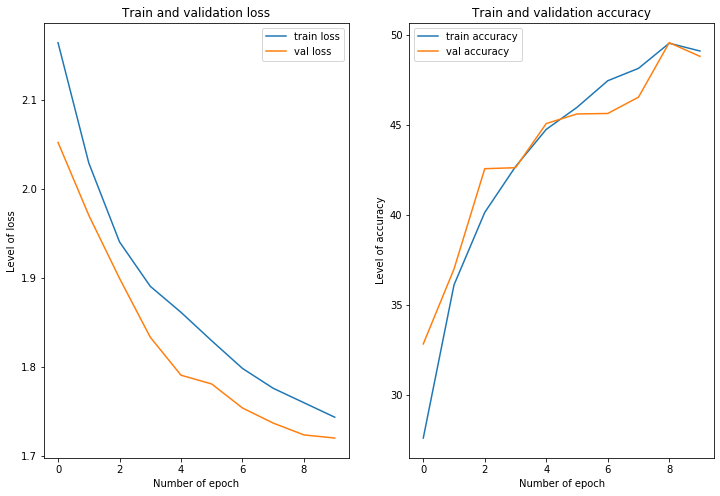

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Done with validation 2 M_3 model


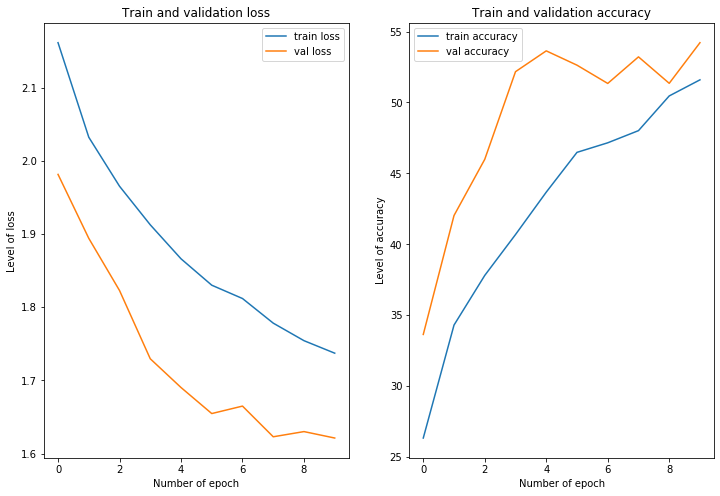

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Done with validation 3 M_3 model


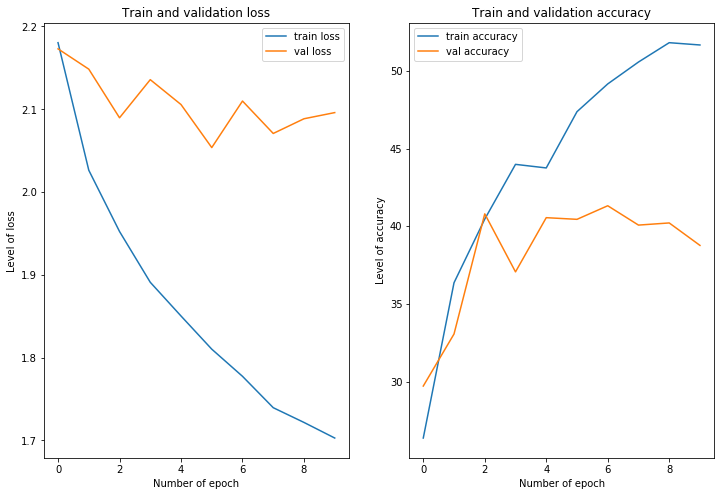

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Done with validation 4 M_3 model


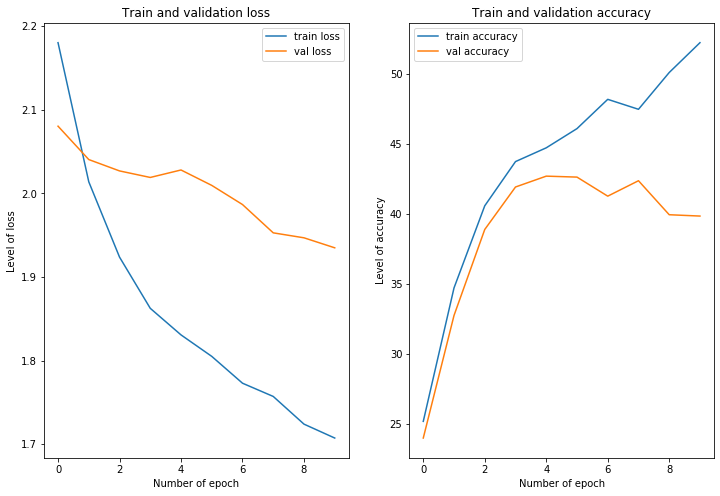

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Done with validation 5 M_3 model


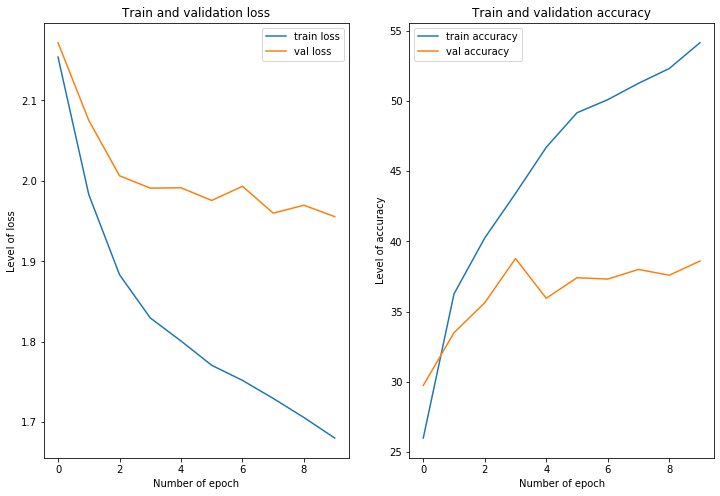

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Done with validation 6 M_3 model


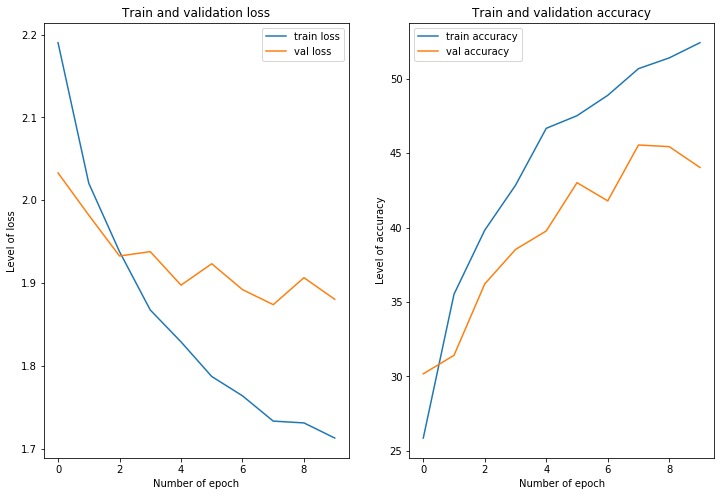

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Done with validation 7 M_3 model


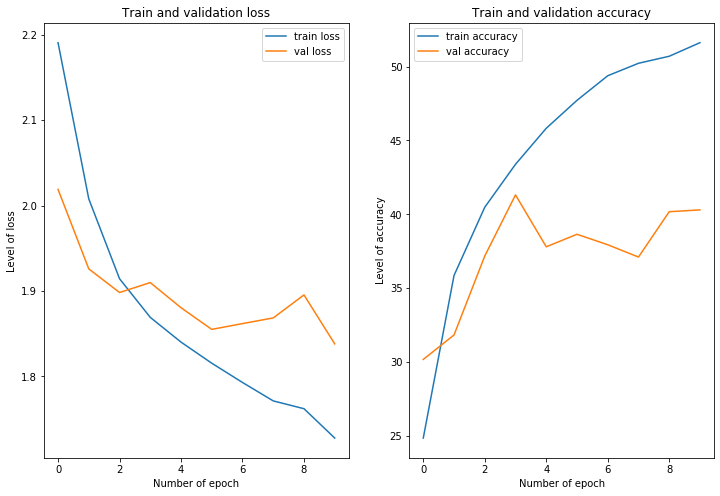

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Done with validation 8 M_3 model


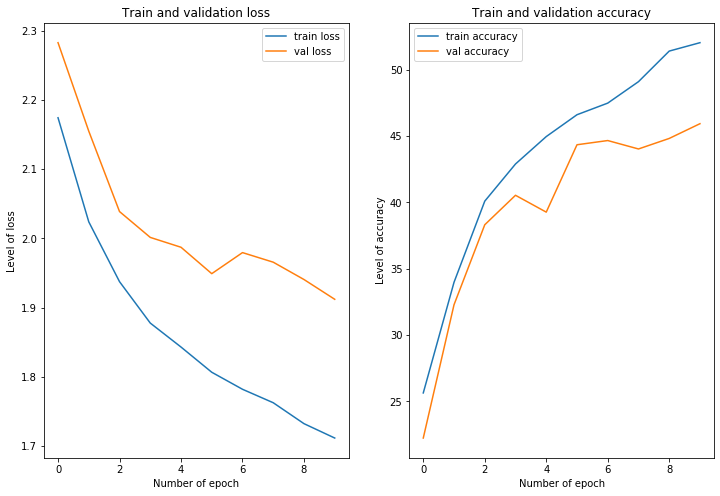

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Done with validation 9 M_3 model


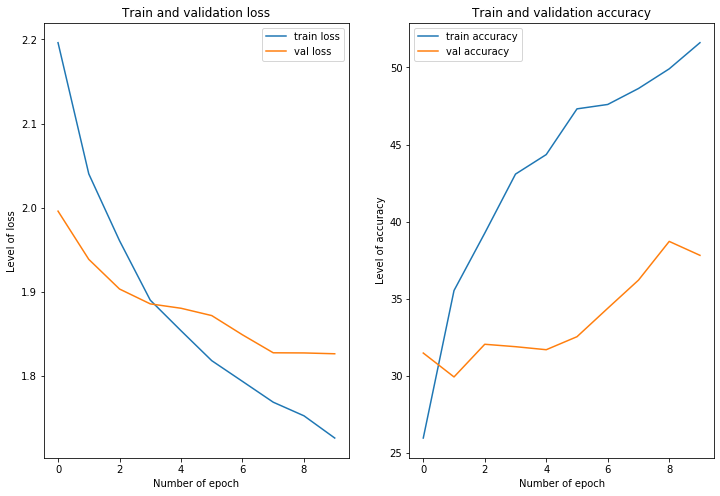

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Done with validation 10 M_3 model


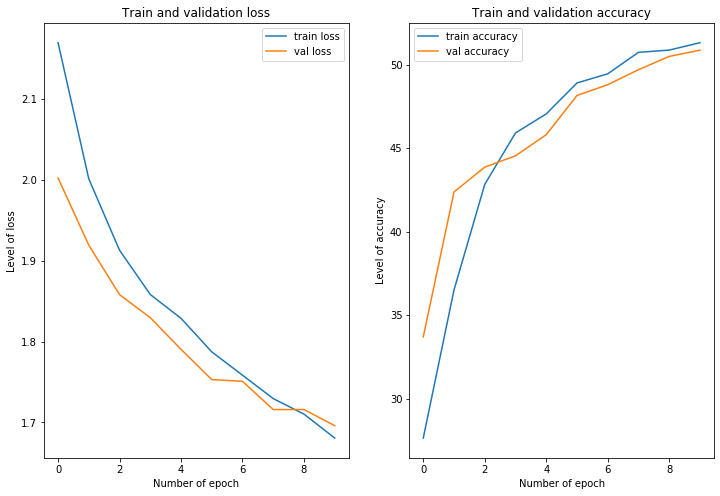

Average train loss of  M_3  is  1.8630926520288895
Average train accuracy of  M_3  is  43.82398584372187
Average val loss of  M_3  is  1.920154881477356
Average val accuracy of  M_3  is  40.170775585322914
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Done with validation 1 M_5 model


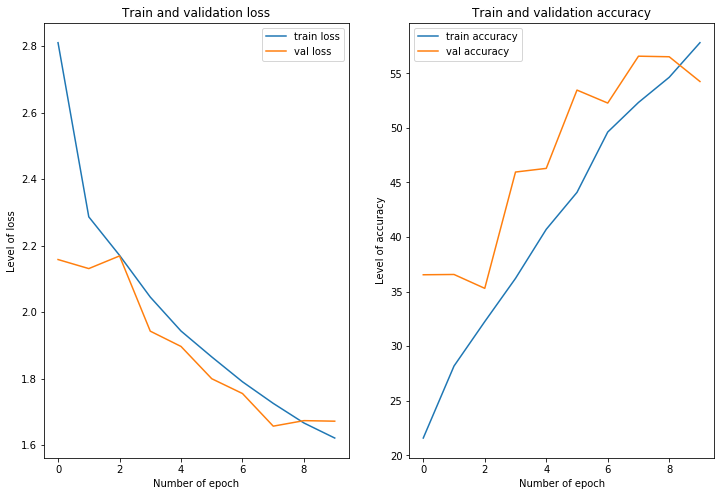

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Done with validation 2 M_5 model


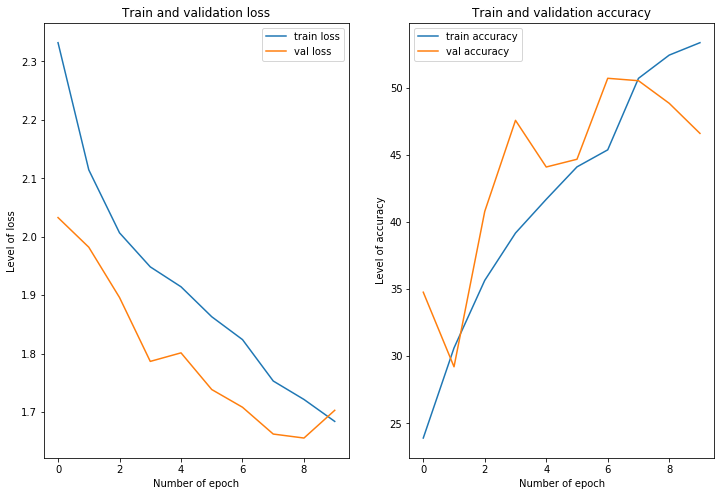

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Done with validation 3 M_5 model


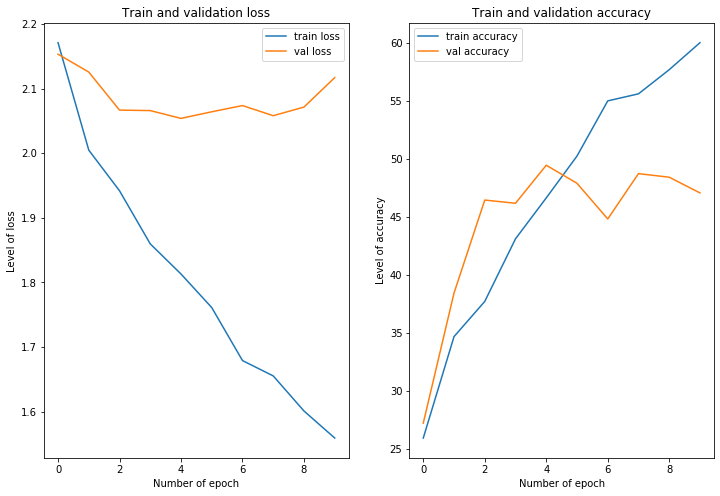

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Done with validation 4 M_5 model


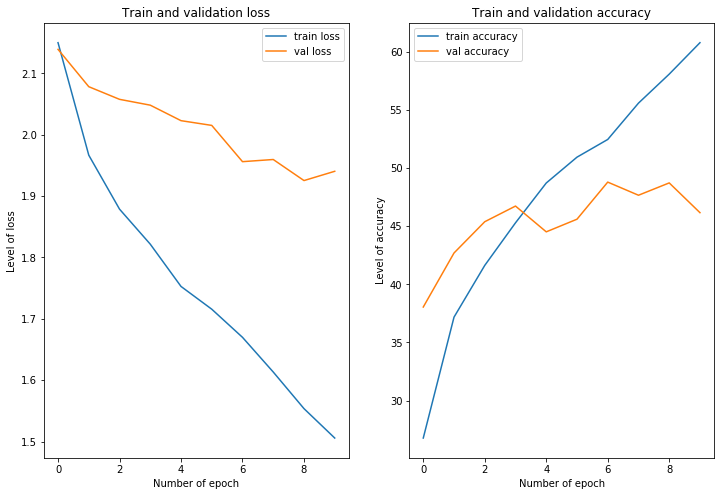

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Done with validation 5 M_5 model


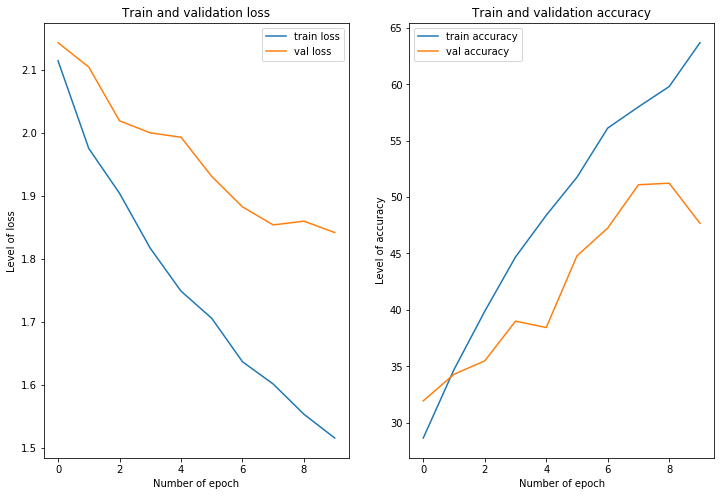

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Done with validation 6 M_5 model


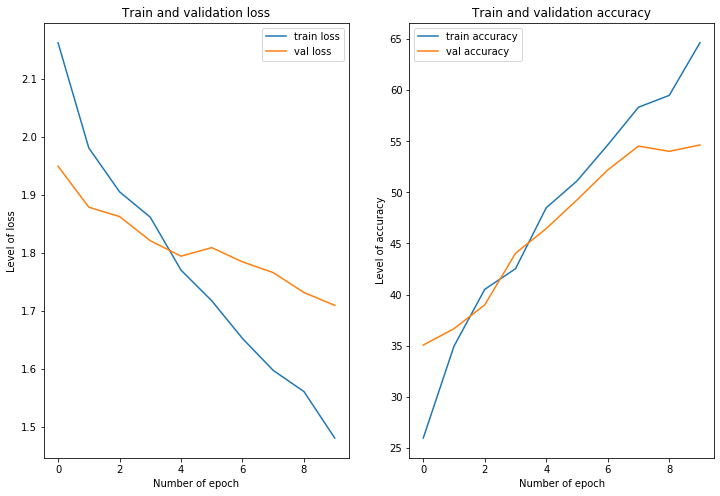

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Done with validation 7 M_5 model


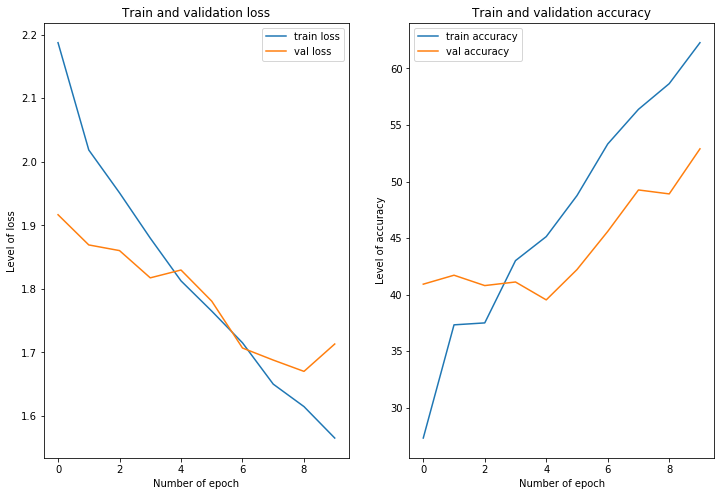

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Done with validation 8 M_5 model


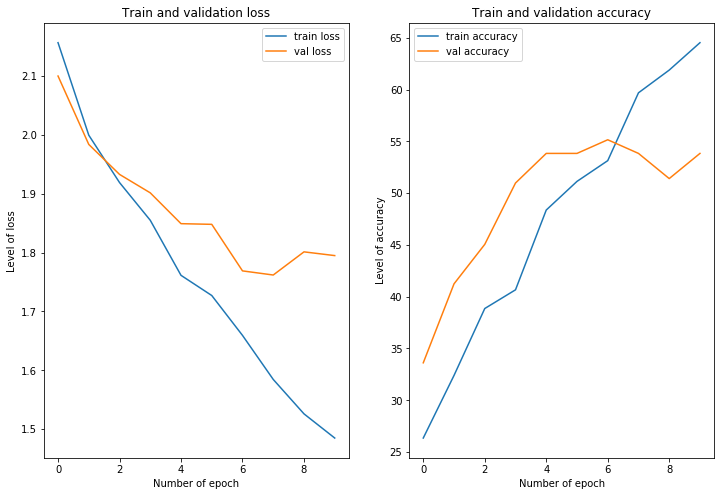

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Done with validation 9 M_5 model


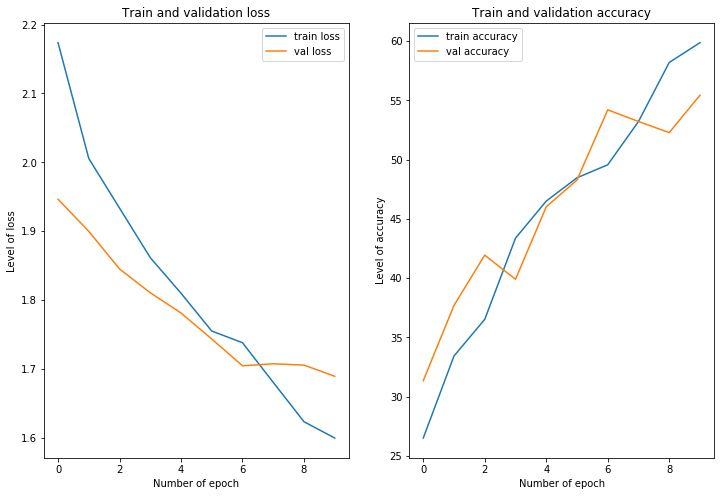

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Done with validation 10 M_5 model


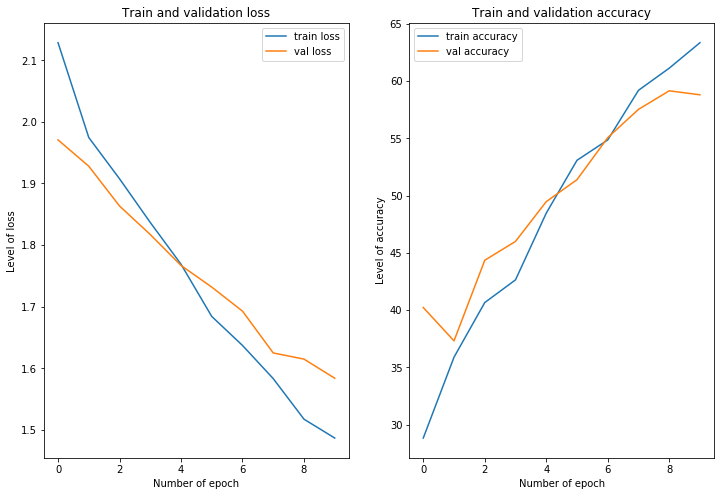

Average train loss of  M_5  is  1.8156235476479403
Average train accuracy of  M_5  is  46.350658216899646
Average val loss of  M_5  is  1.8757679892437795
Average val accuracy of  M_5  is  45.92693331642677
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Done with validation 1 M_11 model


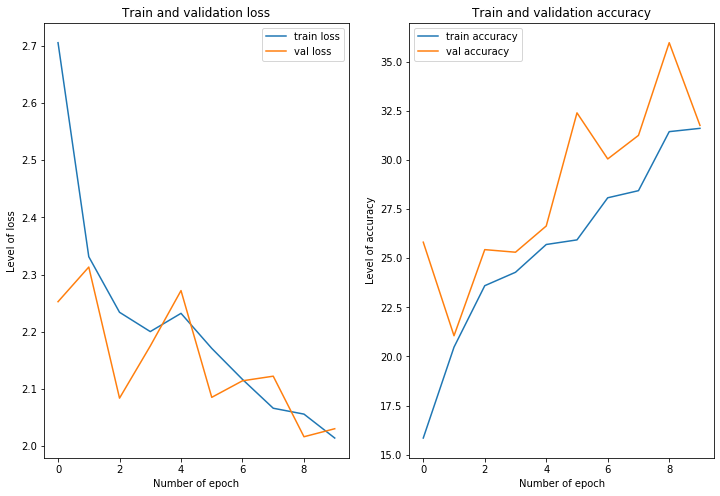

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Done with validation 2 M_11 model


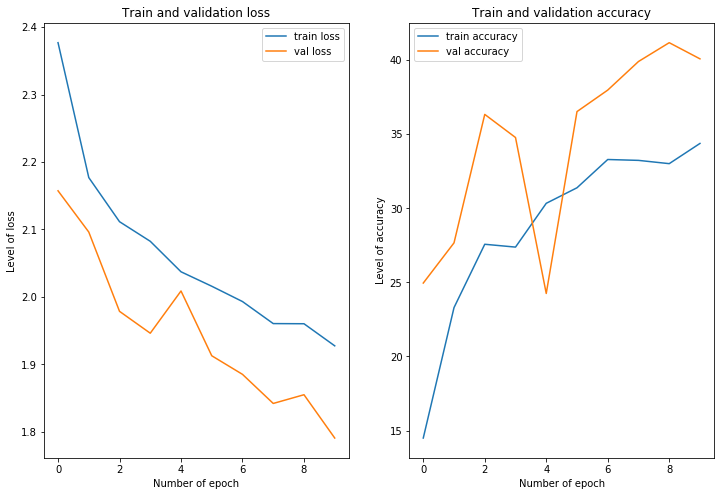

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Done with validation 3 M_11 model


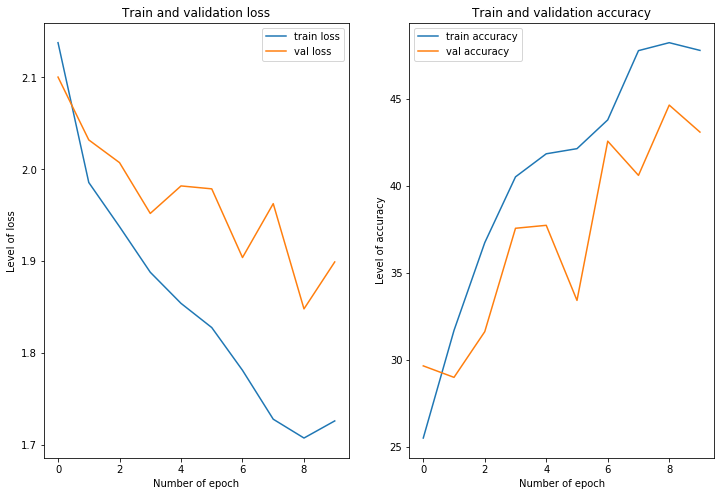

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Done with validation 4 M_11 model


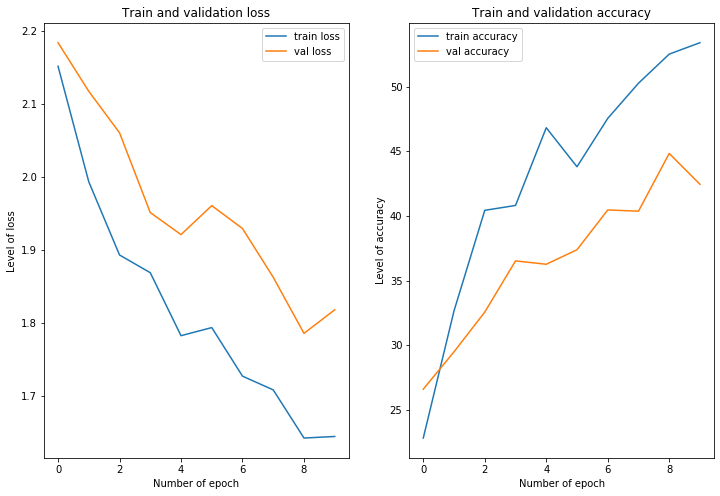

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Done with validation 5 M_11 model


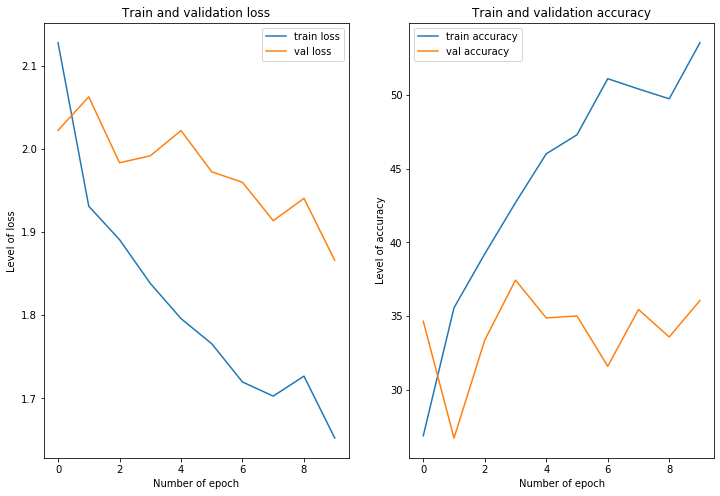

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Done with validation 6 M_11 model


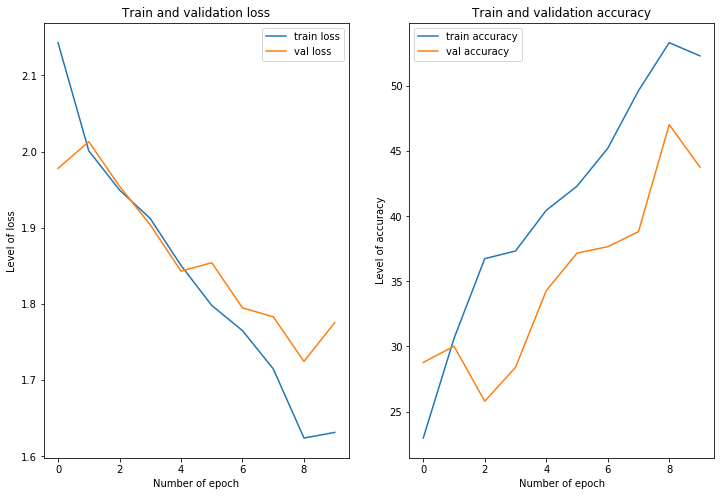

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Done with validation 7 M_11 model


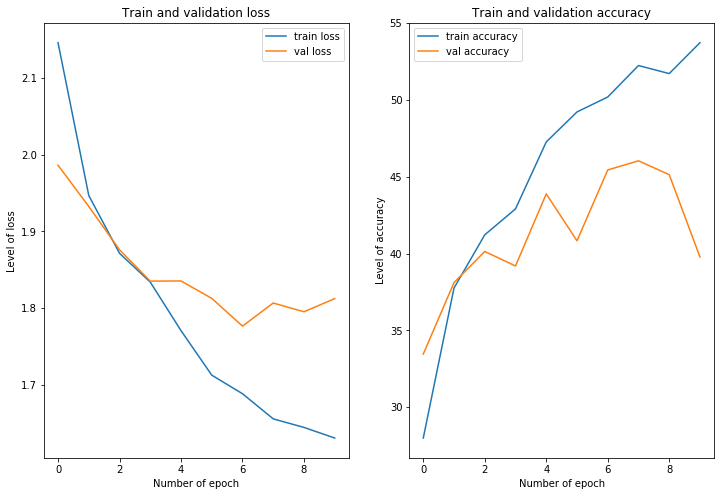

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Done with validation 8 M_11 model


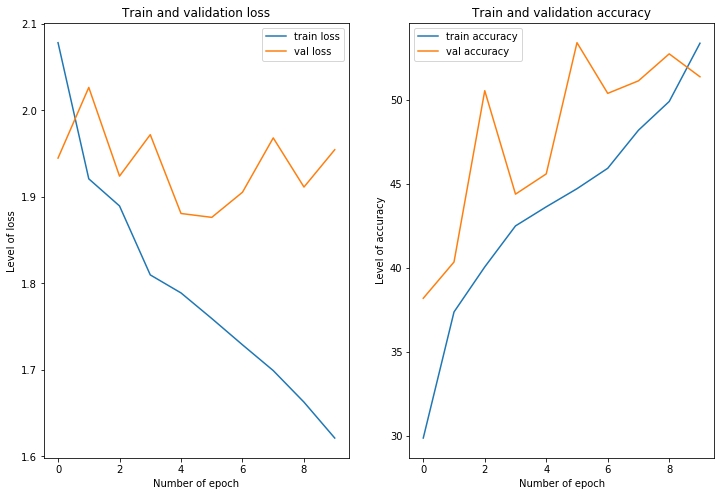

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Done with validation 9 M_11 model


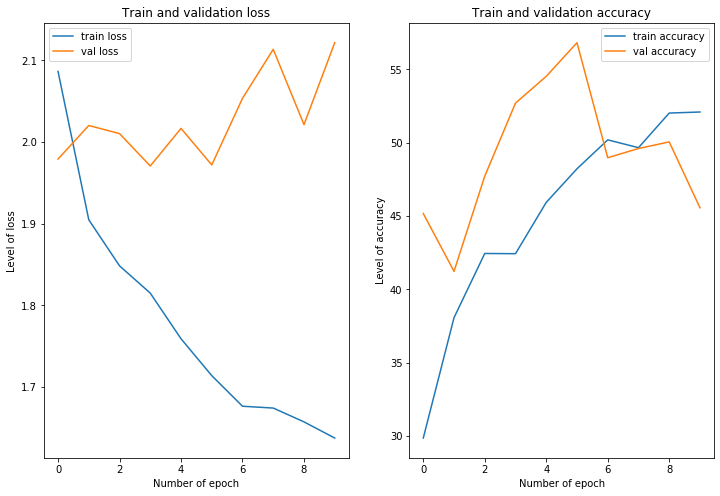

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Done with validation 10 M_11 model


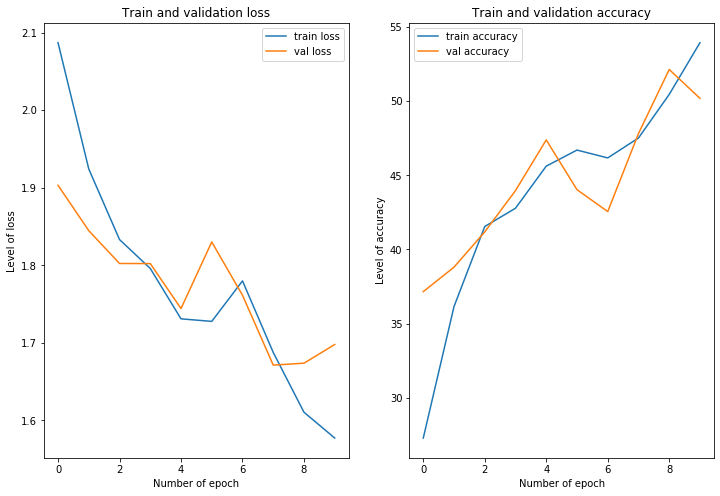

Average train loss of  M_11  is  1.874699251316549
Average train accuracy of  M_11  is  40.1337871888001
Average val loss of  M_11  is  1.943877442223685
Average val accuracy of  M_11  is  38.84442879300544
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Done with validation 1 M_18 model


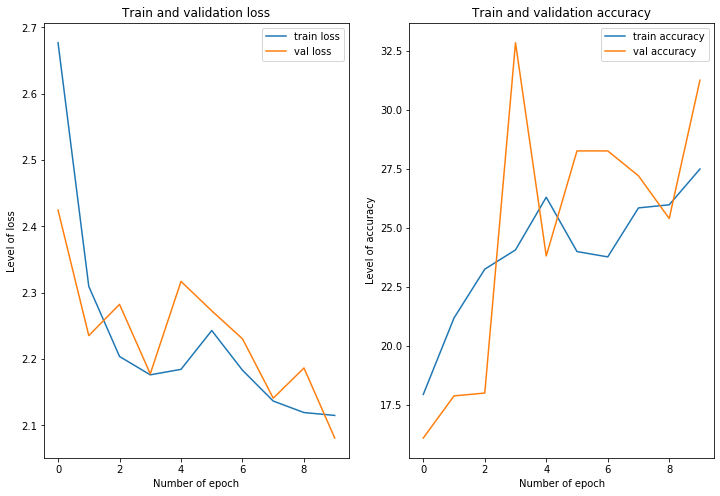

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Done with validation 2 M_18 model


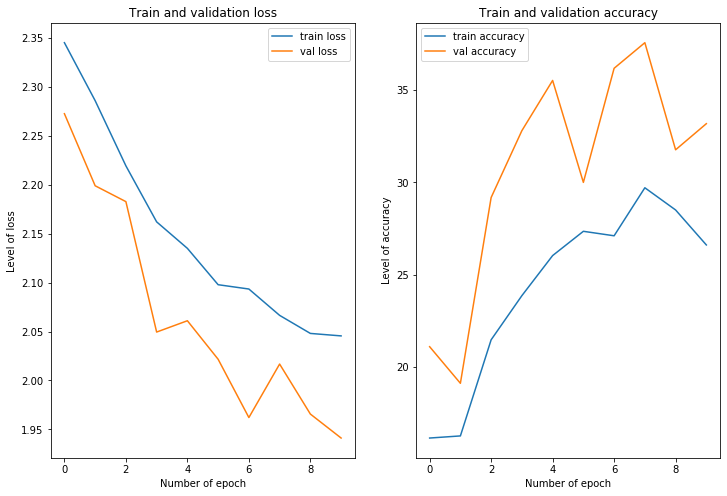

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7


In [0]:
#### Implement using iteration process:
### Create a dataframe of loss and accuracy across folds 
import matplotlib.pyplot as plt 
import warnings; warnings.filterwarnings("ignore")
Data_dict = {}
for model_name,Model in zip(Models,List_architectures):
  loss_train_avg = []
  Acc_train_avg = []
  loss_test_avg = []
  Acc_test_avg = []
  for i, (train,test) in enumerate(LeaveOne.split(Folds)):

    ### folds 
    ### select the train and validation set. 
    Trainset = AudioDataset(file_path=file_path,audio_paths=audio_paths,folds=Folds[train])
    Testset = AudioDataset(file_path=file_path,audio_paths=audio_paths,folds=Folds[test])
    ### Define a dataLoader 
    fig , axis = plt.subplots(1,2,figsize=(12,8))
    Loader_trainset = DataLoader(Trainset,batch_size=128, num_workers=8)
    Loader_test = DataLoader(Testset,batch_size=128,  num_workers=8)
    ### call the train and validation loop here. 
    Loss_train,Accuracy_train,Loss_test,Accuracy_test =  Train_evaluation_loop(model=Model,Loader_trainset=Loader_trainset,Loader_test=Loader_test)
    loss_train_avg.append(np.mean(Loss_train))
    Acc_train_avg.append(np.mean(Accuracy_train))
    loss_test_avg.append(np.mean(Loss_test))
    Acc_test_avg.append(np.mean(Accuracy_test))
    print("Done with validation",i+1,model_name,"model")
    axis[0].plot(Loss_train,label="train loss")
    axis[0].plot(Loss_test,label="val loss")
    axis[0].set_title("Train and validation loss")
    axis[0].legend(loc="best")
    axis[0].set_ylabel("Level of loss")
    axis[0].set_xlabel("Number of epoch")
    axis[1].plot(Accuracy_train,label="train accuracy")
    axis[1].plot(Accuracy_test,label="val accuracy")
    axis[1].legend(loc="best")
    axis[1].set_ylabel("Level of accuracy")
    axis[1].set_xlabel("Number of epoch")
    axis[1].set_title("Train and validation accuracy")
    plt.show()
  print("Average train loss of ",model_name," is ",np.mean(loss_train_avg))
  print("Average train accuracy of ",model_name," is ",np.mean(Acc_train_avg))
  print("Average val loss of ",model_name," is ",np.mean(loss_test_avg))
  print("Average val accuracy of ",model_name," is ",np.mean(Acc_test_avg))  
#Data_loss_acc = pd.DataFrame(Data_dict)
  

In [0]:
### Final plot of model M_18  

- This shows each plot for training and validation for M18 architecture. 

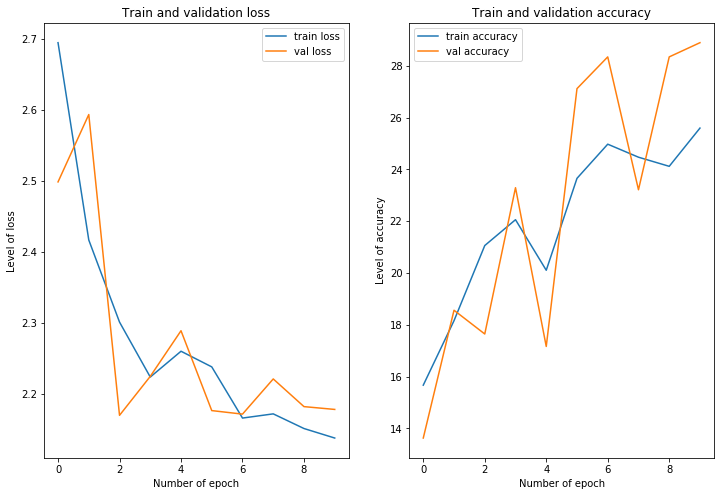

In [0]:
from IPython.display import Image
## first validation 
Image(filename='image1.png',width=800, height=400)

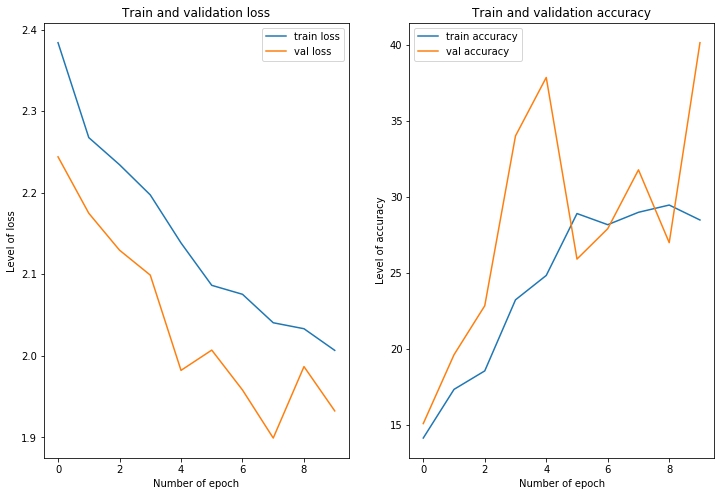

In [0]:
### second validation 
Image(filename='image2.png',width=800, height=400)

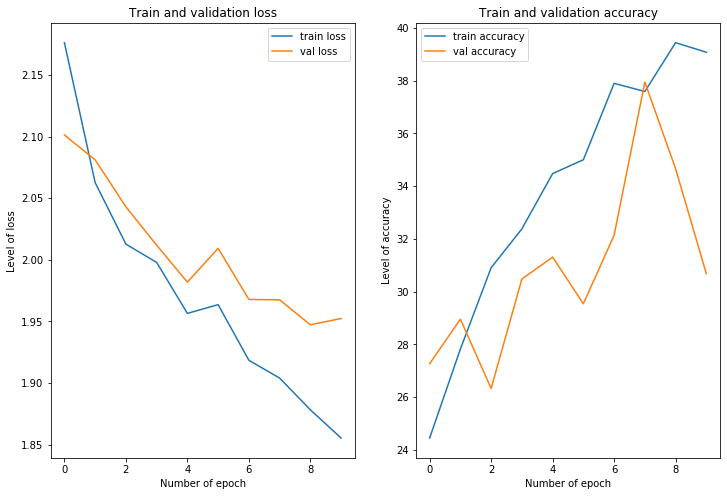

In [0]:
Image(filename='image3.png',width=800, height=400)

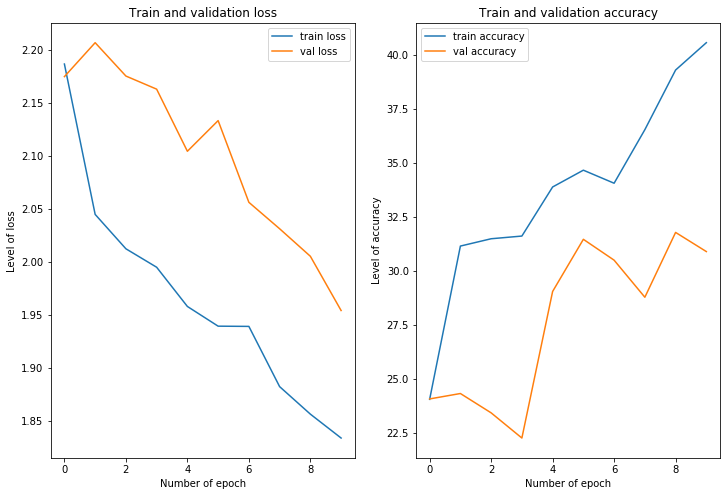

In [0]:
### validation for validation 4
Image(filename='image4.png',width=800, height=400)

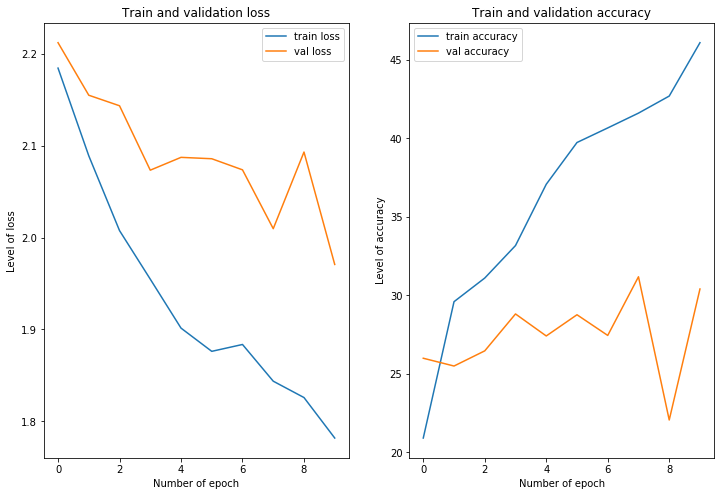

In [0]:
### validation 5
Image(filename='image5.png',width=800, height=400)

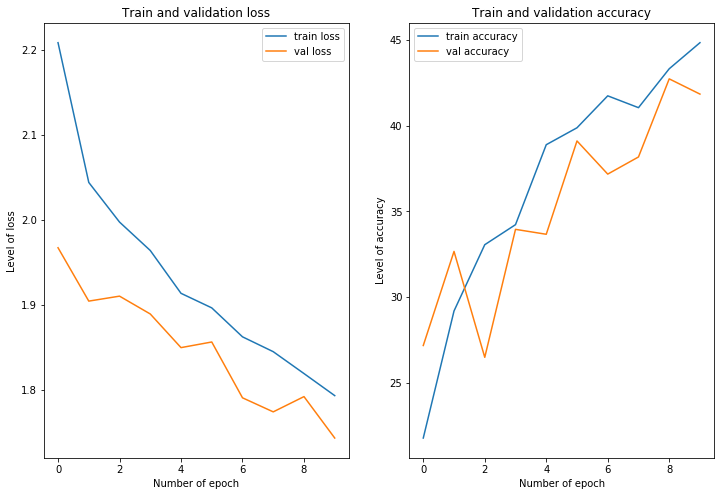

In [0]:
#### validation 6
Image(filename='image6.png',width=800, height=400)

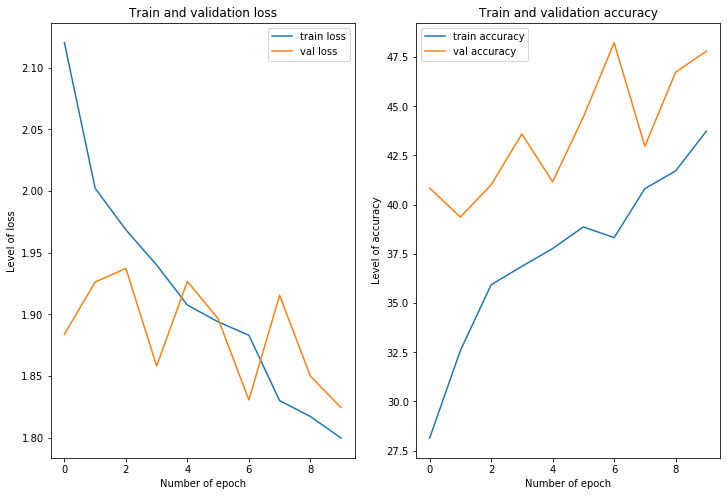

In [0]:
### validation 7
Image(filename='image7.png',width=800, height=400)

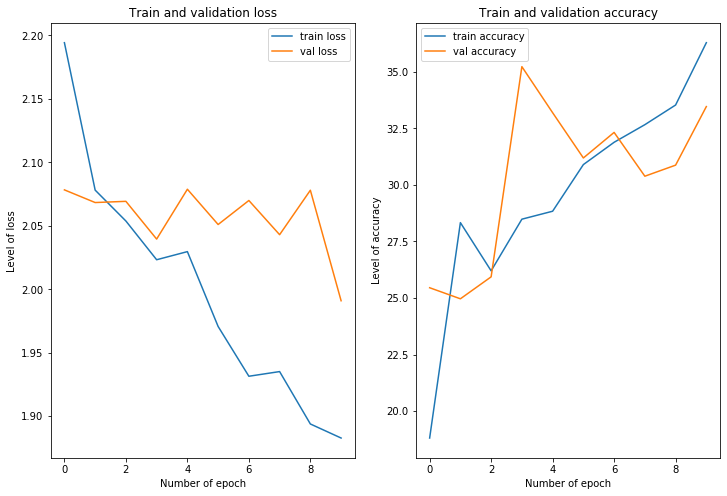

In [0]:
### validation 8
Image(filename='image8.png',width=800, height=400)

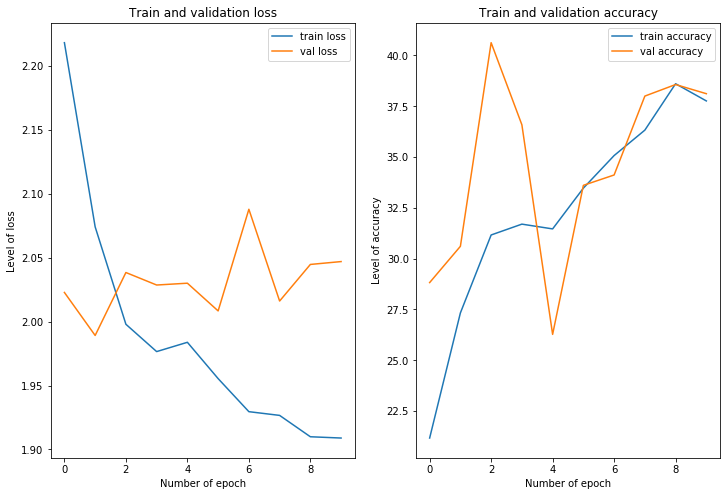

In [0]:
### validation 9
Image(filename='image9.png',width=800, height=400)

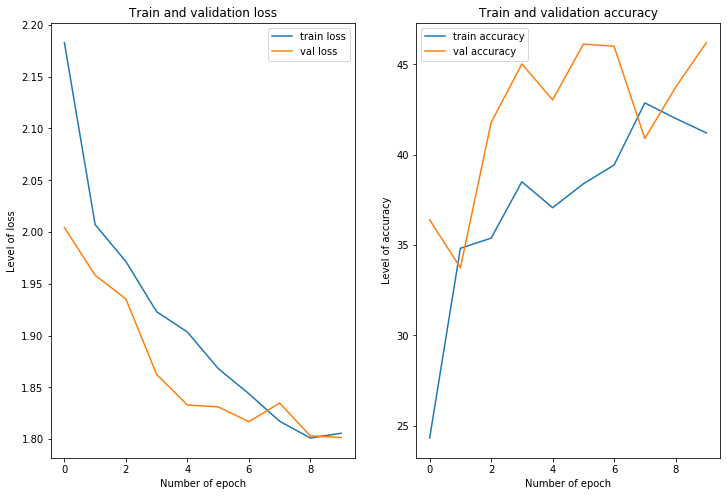

In [0]:
### validation 10
Image(filename='image10.png',width=800, height=400)

### Average across all folds 

This is representation of across all folds validation 
- Average train loss of  M_18  is  2.0044781069994095
- Average train accuracy of  M_18  is  32.37369067224838
- Average val loss of  M_18  is  2.0197254178566593
- Average val accuracy of  M_18  is  32.28403927196739